In [35]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# B1
df = pd.read_excel('heart_short.xlsx',sheet_name="data")

df


,name,t_i,c_i,target
0,An,145,233,1
1,Binh,130,250,1
2,Thanh,130,204,1
3,Tu,130,254,0
4,Anh,140,203,0
5,Thanh An,130,256,0
6,Quoc,140,294,1
7,Kien,120,263,1
8,Long,172,199,1
9,Vu,150,168,1


#### 1. KNN

In [36]:
# B2: Xu ly du lieu
# Tạo tập dữ liệu input (đặc trưng ) 
X = df[['t_i','c_i']].values # input
y = df[['target']].values # output

X = X.astype(float)
y = y.astype(float)

In [37]:
# B3: Chia tập dữ liệu thành training và testing 
# Sipiting data set: 7 mẫu train và 7 mẫu test (tỉ lệ 60:40)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test, indices_train, indices_test = train_test_split(X,y,df.index,test_size=0.4, random_state=34)

# Câu hỏi: cho biết tập test có bao nhiêu mẫu dữ liệu 
# hãy cho biết index của những dòng dữ liệu nào được lấy ngẫu nhiên vào tập test
# Yêu cầu: sinh viên cắt dữ liệu Input và OUtput của tập test vào Execl để quan sát
# Đề cho sẳn test_size , random_state
print(f'Dữ liệu được cắt trong tập test: {indices_test}')

Dữ liệu được cắt trong tập test: Int64Index([0, 11, 8, 2, 7], dtype='int64')


In [38]:
# B4: Huấn luyện mô hình với k=5
# Cau hoi mo hinh k=5 voi mo hinh k=4 mo hinh nao ok hon?
from sklearn.neighbors import KNeighborsClassifier
knnModel = KNeighborsClassifier(n_neighbors=5)

knnModel.fit(X_train, y_train)
# Sử dụng mô hình K-Nearest Neighbors với k=5 để dự đoán nhãn đầu ra.
# knnModel.fit(X_train, y_train): Huấn luyện mô hình dựa trên tập huấn luyện.

c:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier()

In [39]:
# B5: Đánh giá  - Du bao mo hinh qua tap X_test 
y_test_predicted = knnModel.predict(X_test)
print(f'Dự đoán 5 thằng được đi ra: {y_test_predicted}' )         


Dự đoán 5 thằng được đi ra: [0. 0. 0. 0. 0.]


In [40]:
y_test_predicted = knnModel.predict(X_test)
print(f'Độ chính xác của mô hình là: {knnModel.score(X_test, y_test) *100} %')

Độ chính xác của mô hình là: 20.0 %


In [41]:
# Câu hỏi: Tập giá trị nhãn để dự báo là gì? --> kết luận đây là mô hình nhị phân 
classes = knnModel.classes_
classes

array([0., 1.])

In [42]:
# Tính xác suất tiền trước khi quyết định trên tập mẫu 
y_test_prob = knnModel.predict_proba(X_test)
y_test_prob
#           0   |  1 :  0 là  không bệnh , 1 là bệnh 
#     AN   :0.8 | 0.2 --> có 4 không bệnh - 1 bênh
#    Thanh :0.6 | 0.4 --> có 3 không bệnh - 2 bệnh

array([[0.8, 0.2],
       [0.6, 0.4],
       [0.6, 0.4],
       [0.6, 0.4],
       [0.6, 0.4]])

In [43]:
# Câu hỏi: nếu thiết lập ngưỡng quyết định 0.85. Thì kết quả là 
print('prediciton with threshold 0.85: ')
y_pred_test_085 = (knnModel.predict_proba(X_test)[:, 1] >= 0.85).astype(float)
y_pred_test_085
# Câu hỏi: Nếu thiết lập ngưỡng (threshold) quyết định là 0.85. Thì kết quả accuracy
print('prediction with threshold 0.85')
y_pred_test_085 = (knnModel.predict_proba(X_test)[:, 1] >= 0.85).astype(float)
y_pred_test_085

prediciton with threshold 0.85: 
prediction with threshold 0.85


array([0., 0., 0., 0., 0.])

In [44]:
# Câu hỏi: Nếu thiết lập ngưỡng (threshold) quyết định là 0.25. Thì kết quả accuracy
print('prediction with threshold 0.25')
y_pred_test_085 = (knnModel.predict_proba(X_test)[:, 1] >= 0.25).astype(float)
y_pred_test_085
# array([0., 1., 1., 1., 1.]) bon so 1 la bon benh , 1 khong benh 

prediction with threshold 0.25


array([0., 1., 1., 1., 1.])

#### 2. Confusion matrix

In [45]:
# Tạo confusion - Metric 
from sklearn.metrics import confusion_matrix
cf_matrix = confusion_matrix(y_test, y_test_predicted)
cf_matrix

array([[1, 0],
       [4, 0]], dtype=int64)

In [46]:
# Các giá trị tn, fp, fn , tp
tn, fp, fn , tp = confusion_matrix(y_test, y_test_predicted).ravel()
print(f'{tn}, {fp}, {fn}, {tp}')

1, 0, 4, 0


#### 4.Vẽ biểu đồ AUC-ROC:

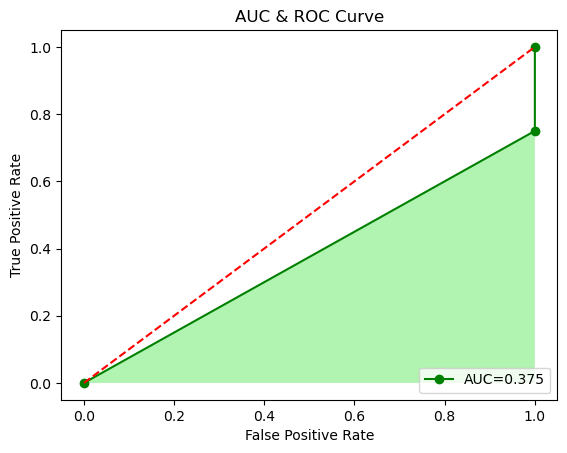

In [48]:
from sklearn import metrics
y_pred_proba = knnModel.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,'go-',label="AUC="+str(auc))
plt.plot([0,1],[0,1],'r--')
plt.title("AUC & ROC Curve")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=4)
plt.fill_between(fpr, tpr, facecolor='lightgreen', alpha=0.7)
plt.show()
# Màu xânh dưới màu đỏ thì ---> Mô hình xấu 
# Mauf xanh cao hơn lớn hơn màu đỏ --> Mô hình tốt 

In [49]:
# Tính precison, recall, F1 theo nhom
from sklearn.metrics import classification_report
target_names = ['Không bệnh', 'Có bệnh']
print(classification_report(y_test, y_test_predicted, target_names=target_names))


              precision    recall  f1-score   support

  Không bệnh       0.20      1.00      0.33         1
     Có bệnh       0.00      0.00      0.00         4

    accuracy                           0.20         5
   macro avg       0.10      0.50      0.17         5
weighted avg       0.04      0.20      0.07         5



c:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# Xây dụng chương tình dự báo
# 

In [50]:
import pickle
pickle.dump(knnModel, open('model_KNN_Heart.sav', 'wb'))


In [52]:
import pickle
#Load model từ storage
loaded_model = pickle.load(open('model_KNN_Heart.sav', 'rb'))
v1 = float(input('t_i: '))
v2 = float(input('c_i: '))

y_pred = loaded_model.predict([[v1,v2]])
print('Kết quả dự báo bệnh tim: '+ str(y_pred[0]))

if (y_pred[0] == 1):
    print("Bị bệnh tim")
else:
    print("Không bị bệnh")
# t_i : 1.55
# c_i: 2.75

Kết quả dự báo bệnh tim: 0.0
Không bị bệnh
